<a href="https://colab.research.google.com/github/JuniorDurand/Introduction-to-Image-Classification-with-Deep-Learning/blob/main/Apresenta%C3%A7%C3%A3o_gato_cachorro_sexta_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports e instalação de bibliotecas

In [1]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import files
from keras.utils import to_categorical
import sklearn
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Input, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
import zipfile



https://drive.google.com/file/d/1a48PgAU7JKXSF_RKvuWP0tLNRpa4fWBK/view?usp=sharing

In [3]:
path = "/content/drive/MyDrive/data_catDog/cat_dog_2.zip"
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

KeyboardInterrupt: ignored

## **Dataset**

#### Carregando uma unica imagem

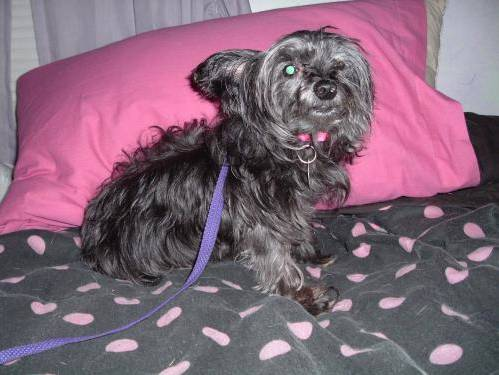

In [2]:
img_path = "/content/cat_dog_2/training_set/dog/dog.0.jpg"
img = cv2.imread(img_path)

cv2_imshow(img)


In [3]:
print(img)

[[[124 113 115]
  [127 116 118]
  [130 117 119]
  ...
  [141 131 131]
  [139 131 131]
  [139 131 131]]

 [[125 114 116]
  [127 116 118]
  [130 117 119]
  ...
  [143 133 133]
  [141 133 133]
  [141 133 133]]

 [[126 115 117]
  [128 117 119]
  [131 118 120]
  ...
  [145 135 135]
  [143 135 135]
  [143 135 135]]

 ...

 [[ 77  73  68]
  [ 81  77  72]
  [ 83  79  74]
  ...
  [ 85  83  73]
  [ 84  82  72]
  [ 83  81  71]]

 [[ 75  71  66]
  [ 77  73  68]
  [ 77  73  68]
  ...
  [ 77  75  65]
  [ 77  75  65]
  [ 78  76  66]]

 [[ 74  70  65]
  [ 75  71  66]
  [ 74  70  65]
  ...
  [ 76  74  64]
  [ 76  74  64]
  [ 76  74  64]]]


#### Carregando o Dataset

In [4]:
TRAIN_PATH = "/content/cat_dog_2/training_set"
VAL_PATH = "/content/cat_dog_2/test_set"
FORMAT_DATA = 'jpg'

In [5]:
images = []
labels = []

ROOT = "/content/cat_dog_2/training_set"
for root, dirs, files in os.walk(ROOT):
  for f in files:
    if "jpg" in f:
      img = cv2.imread(root+"/"+f) # matriz da imagem
      img = cv2.resize(img, (128,128))
      img = img/255
      images.append(img)
      if "cat" in f:
        labels.append(0)
      elif "dog" in f:
        labels.append(1)


In [6]:
print(f'Qtd de images: {len(images)}')
print(f'Qtd de labels: {len(labels)}')

Qtd de images: 4000
Qtd de labels: 4000


0


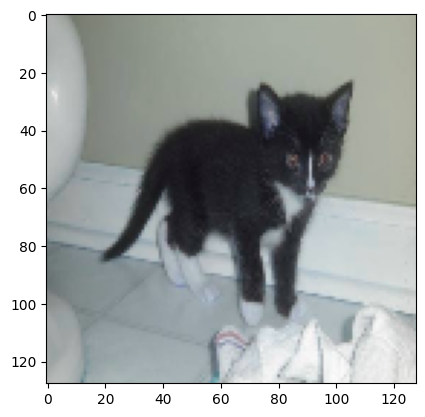

In [7]:
n = 0
plt.imshow(images[n])
print(labels[n])

In [6]:
X = np.array(images)

In [ ]:
labels

In [7]:
y = to_categorical(labels, num_classes=2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [11]:
X.shape, y.shape

((4000, 128, 128, 3), (4000, 2))

[1. 0.]


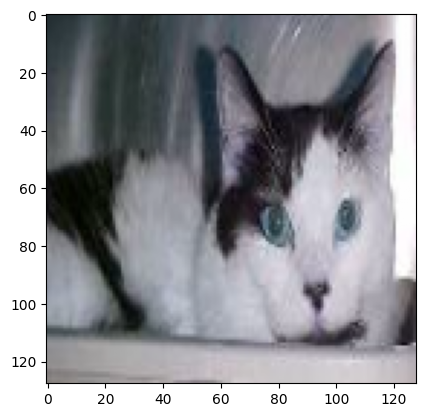

In [8]:
n = 403
plt.imshow(X[n])
print(y[n])

## Divisão de dados

Divisão em treino e teste

### Hold-out

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

NameError: ignored

[0. 1.]


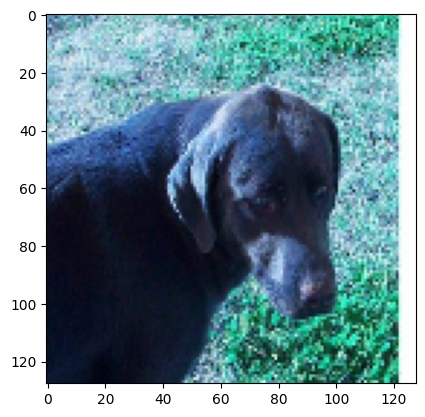

In [26]:
n = 0

# cv2_imshow(X_train[n])
plt.imshow(X_train[n])
print(y_train[n])

[1. 0.]


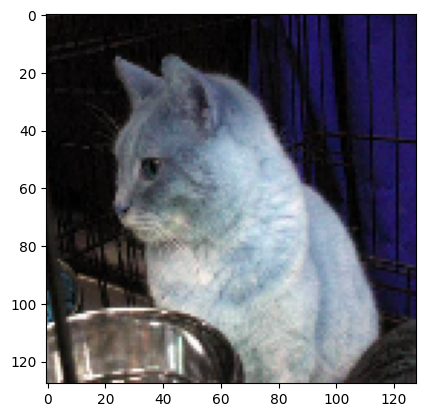

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

n = 0

# cv2_imshow(X_train[n])
plt.imshow(X_train[n])
print(y_train[n])

### Cross-validation

In [9]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)

cross_iter = []

# StratifiedKFold não suporta one-hot encoding
temp_y = np.argmax(y, axis=1)

for i, (train_index, test_index) in enumerate(skf.split(X, temp_y)):
  iter = {
      "train_index": train_index,
      "test_index": test_index
  }
  cross_iter.append(iter)

In [10]:
for i in range(5):
  for j in range(5):
    print(i+1, j+1, np.all(np.isin(cross_iter[i]["test_index"], cross_iter[j]["train_index"])))

1 1 False
1 2 True
1 3 True
1 4 True
1 5 True
2 1 True
2 2 False
2 3 True
2 4 True
2 5 True
3 1 True
3 2 True
3 3 False
3 4 True
3 5 True
4 1 True
4 2 True
4 3 True
4 4 False
4 5 True
5 1 True
5 2 True
5 3 True
5 4 True
5 5 False


In [11]:
def get_indexs(indexs, data, labels):
  data_slice = []
  labels_slice = []
  for i in indexs:
    data_slice.append(data[i])
    labels_slice.append(labels[i])

  data_slice = np.array(data_slice)
  labels_slice = np.array(labels_slice)

  return data_slice, labels_slice

[1. 0.]


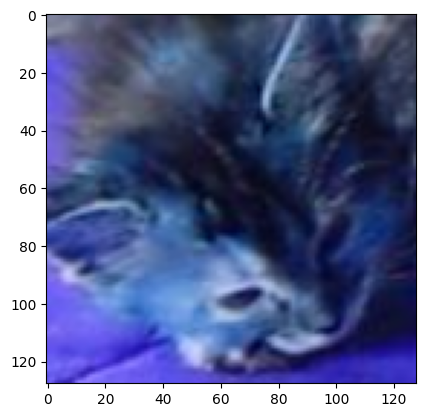

In [12]:
X_test, Y_test = get_indexs(cross_iter[i]["test_index"], X, y)

n = 40

# cv2_imshow(X_test[n])
plt.imshow(X_test[n])
print(Y_test[n])

## **Construção do modelo**

In [16]:
def buildModel():
  network = Sequential()
  # network.add(tf.keras.layers.InputLayer( input_shape=(128,128,3)) )
  network.add(Conv2D(32, (3,3), input_shape=(128,128,3), activation='relu', padding='same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Conv2D(64, (3,3), activation='relu', padding = 'same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Conv2D(128, (3,3), activation='relu', padding = 'same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  network.add(Conv2D(256, (3,3), activation='relu', padding = 'same'))
  network.add(MaxPooling2D(pool_size=(2,2)))
  # # network.add(Dense(units=32, activation='relu'))
  # # network.add(Dropout(0.3))
  # network.add(Flatten())
  # network.add(tf.keras.applications.DenseNet121(input_shape=(128,128,3), include_top=False))
  network.add(GlobalAveragePooling2D())
  network.add(Dense(units=2, activation='softmax'))
  return network

  # return tf.keras.applications.DenseNet121(input_shape=(128,128,3), classes=2, weights=None)

## **Experimentação**

### *Holdout*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)
model = buildModel()
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
# historico = model.fit(X_train,y_train, validation_split=0.2, epochs=2, callbacks=[])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                                 
 global_average_pooling2d_7  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_14 (Dense)            (None, 2)                 2050      
                                                                 
Total params: 7039554 (26.85 MB)
Trainable params: 6955906 (26.53 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


In [ ]:
predicts = model.predict(X_test, batch_size=1)

168/168 [==============================] - 0s 2ms/step


In [ ]:
predicts

array([[0.47593468, 0.52406526],
       [0.4958215 , 0.50417846],
       [0.8048797 , 0.19512026],
       [0.9880057 , 0.01199427],
       [0.44281378, 0.55718625],
       [0.46369368, 0.5363064 ],
       [0.44308925, 0.5569108 ],
       [0.46948552, 0.5305145 ],
       [0.47232485, 0.52767515],
       [0.42433536, 0.57566464],
       [0.44060817, 0.55939186],
       [0.43346995, 0.56653005],
       [0.7026143 , 0.29738566],
       [0.5796576 , 0.42034242],
       [0.48195615, 0.5180439 ],
       [0.5826781 , 0.41732192],
       [0.47373632, 0.52626365],
       [0.39957923, 0.6004208 ],
       [0.64919525, 0.35080472],
       [0.7457444 , 0.2542556 ],
       [0.6643417 , 0.33565834],
       [0.46753362, 0.53246635],
       [0.5881202 , 0.41187978],
       [0.5001388 , 0.49986124],
       [0.4508975 , 0.5491025 ],
       [0.4639694 , 0.53603065],
       [0.447562  , 0.552438  ],
       [0.46809652, 0.53190345],
       [0.68624157, 0.31375843],
       [0.45591038, 0.5440896 ],
       [0.

In [ ]:
predicts = np.argmax(predicts,axis=1)

In [ ]:
predicts

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [ ]:
y_test = np.argmax(y_test, axis=1)

AxisError: ignored

In [ ]:
X[0]

array([[[243, 234, 231],
        [243, 234, 231],
        [243, 234, 231],
        ...,
        [115, 123, 113],
        [118, 126, 116],
        [118, 126, 116]],

       [[243, 234, 231],
        [243, 234, 231],
        [243, 234, 231],
        ...,
        [115, 123, 113],
        [118, 126, 116],
        [118, 126, 116]],

       [[243, 234, 231],
        [243, 234, 231],
        [243, 234, 231],
        ...,
        [115, 123, 113],
        [118, 126, 116],
        [118, 126, 116]],

       ...,

       [[200, 203, 209],
        [201, 204, 209],
        [202, 205, 210],
        ...,
        [202, 209, 216],
        [198, 205, 212],
        [198, 206, 213]],

       [[191, 192, 202],
        [193, 194, 204],
        [199, 200, 210],
        ...,
        [208, 211, 215],
        [199, 202, 207],
        [197, 200, 204]],

       [[193, 194, 204],
        [190, 191, 201],
        [193, 194, 204],
        ...,
        [211, 214, 218],
        [202, 205, 209],
        [195, 198, 202]]

In [ ]:
#avaliação
predicts = model.predict(X_test)
predicts = np.argmax(predicts, axis=1)

6/6 [==============================] - 0s 13ms/step


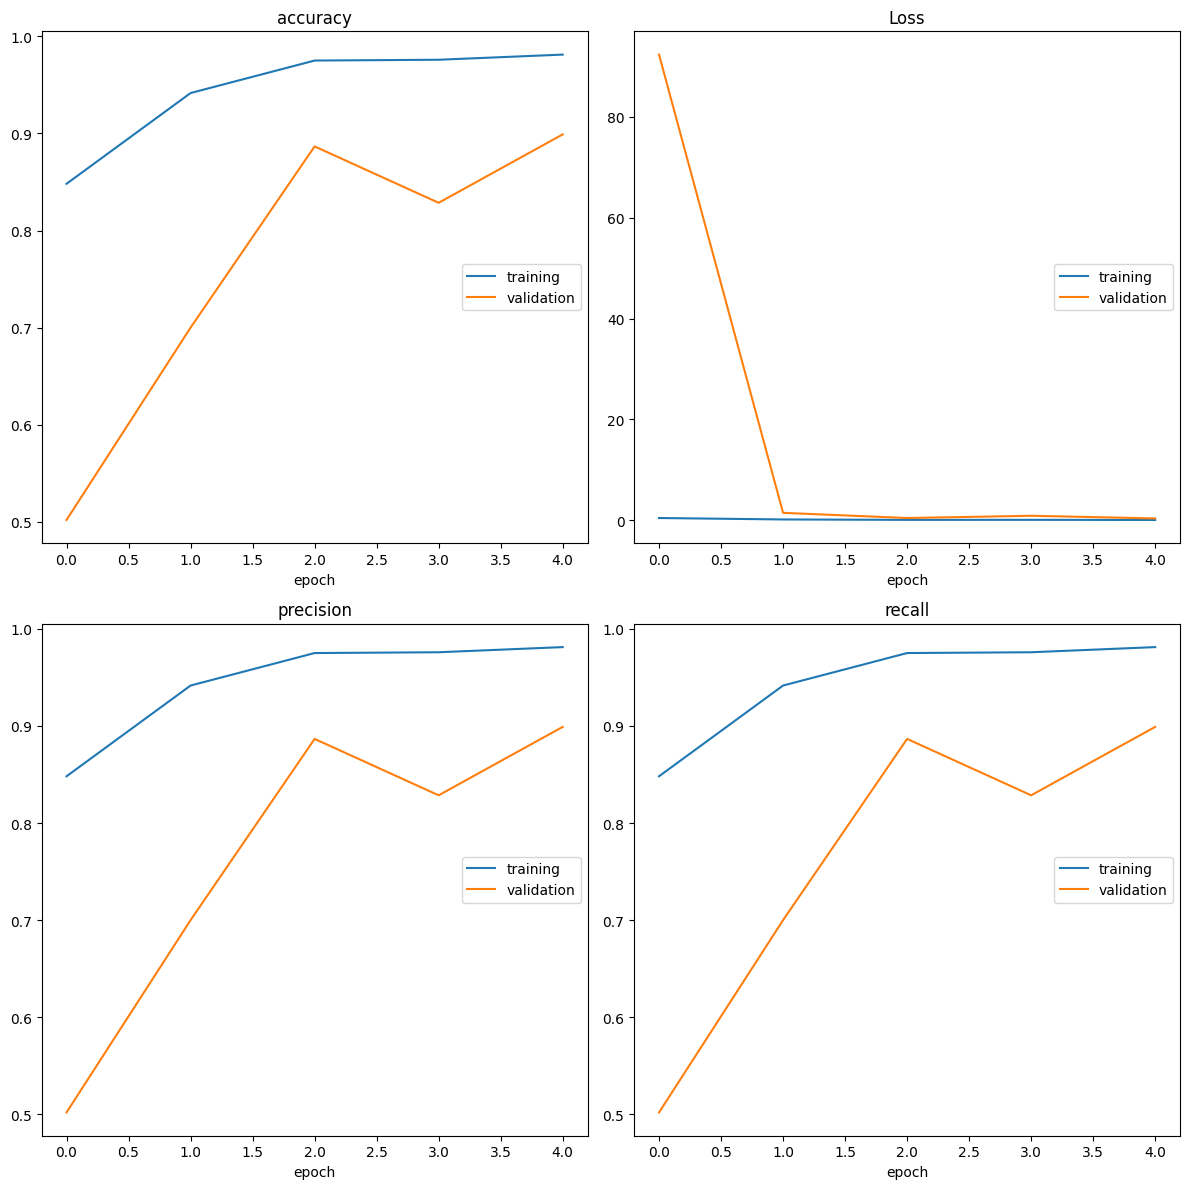

accuracy
	training         	 (min:    0.848, max:    0.981, cur:    0.981)
	validation       	 (min:    0.502, max:    0.899, cur:    0.899)
Loss
	training         	 (min:    0.049, max:    0.434, cur:    0.049)
	validation       	 (min:    0.352, max:   92.365, cur:    0.352)
precision
	training         	 (min:    0.848, max:    0.981, cur:    0.981)
	validation       	 (min:    0.502, max:    0.899, cur:    0.899)
recall
	training         	 (min:    0.848, max:    0.981, cur:    0.981)
	validation       	 (min:    0.502, max:    0.899, cur:    0.899)
47/47 [==============================] - 3s 31ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       750
           1       0.00      0.00      0.00       750

    accuracy                           0.50      1500
   macro avg       0.25      0.50      0.33      1500
weighted avg       0.25      0.50      0.33      1500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [ ]:
acc = []
prec = []
recall = []
f1 = []
classification_reports = []

for i in range(1):
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True, stratify=Y)
  model = buildModel()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  historico = model.fit(X_train/255,y_train, validation_split=0.3, batch_size=64, epochs=5, callbacks=[PlotLossesKeras()])

  #avaliação
  predicts = model.predict(X_test)
  predicts = np.argmax(predicts, axis=1)
  y_test = np.argmax(y_test, axis=1)
  report_dict = classification_report(y_test, predicts, output_dict=True)
  classification_reports.append(report_dict)
  print(classification_report(y_test, predicts))



In [ ]:
import gc
gc.collect()

12304

In [33]:
pip install livelossplot

In [34]:
from livelossplot import PlotLossesKeras

In [35]:
PlotLossesKeras()

### *Cross-Validation*

In [17]:
acc = []
prec = []
recall = []
f1 = []
classification_reports = []

skf = StratifiedKFold(n_splits=5)

temp_y = np.argmax(y, axis=1)

for train_index, test_index in skf.split(X, temp_y):
  X_train, y_train = get_indexs(train_index, X, y)
  X_test, y_test = get_indexs(test_index, X, y)

  tf.keras.backend.clear_session()
  gc.collect()


  model = buildModel()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
  historico = model.fit(X_train/255,y_train, validation_split=0.3, batch_size=64, epochs=25, callbacks=[])

  #avaliação
  predicts = model.predict(X_test/255)
  predicts = np.argmax(predicts, axis=1)
  y_test = np.argmax(y_test, axis=1)
  report_dict = classification_report(y_test, predicts, output_dict=True)
  classification_reports.append(report_dict)
  print(classification_report(y_test, predicts))

  tf.keras.backend.clear_session()
  gc.collect()



Epoch 1/25
35/35 [==============================] - 15s 74ms/step - loss: 0.6202 - accuracy: 0.6991 - precision: 0.6991 - recall: 0.6991 - val_loss: 1.1667 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
35/35 [==============================] - 2s 44ms/step - loss: 0.6007 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.0934 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
35/35 [==============================] - 2s 44ms/step - loss: 0.6010 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.1955 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
35/35 [==============================] - 2s 46ms/step - loss: 0.5991 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.2114 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
35/35 [==============================] - 2s 47ms

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Epoch 1/25
35/35 [==============================] - 4s 69ms/step - loss: 0.6171 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.2964 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
35/35 [==============================] - 2s 48ms/step - loss: 0.6061 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.2977 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
35/35 [==============================] - 2s 48ms/step - loss: 0.5993 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.3538 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
35/35 [==============================] - 1s 41ms/step - loss: 0.6008 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.1321 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
35/35 [==============================] - 1s 41ms/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Epoch 1/25
35/35 [==============================] - 5s 65ms/step - loss: 0.6255 - accuracy: 0.6946 - precision: 0.6946 - recall: 0.6946 - val_loss: 1.3246 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
35/35 [==============================] - 2s 44ms/step - loss: 0.6004 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.3263 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
35/35 [==============================] - 2s 44ms/step - loss: 0.5997 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.1624 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
35/35 [==============================] - 2s 43ms/step - loss: 0.5995 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.3115 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
35/35 [==============================] - 2s 50ms/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Epoch 1/25
35/35 [==============================] - 4s 69ms/step - loss: 0.6208 - accuracy: 0.7036 - precision: 0.7036 - recall: 0.7036 - val_loss: 1.1314 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
35/35 [==============================] - 2s 45ms/step - loss: 0.6012 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.2198 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
35/35 [==============================] - 2s 49ms/step - loss: 0.6000 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.2869 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
35/35 [==============================] - 2s 49ms/step - loss: 0.6010 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.1618 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
35/35 [==============================] - 1s 43ms/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Epoch 1/25
35/35 [==============================] - 5s 76ms/step - loss: 0.6157 - accuracy: 0.7125 - precision: 0.7125 - recall: 0.7125 - val_loss: 1.4748 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
35/35 [==============================] - 2s 44ms/step - loss: 0.6057 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.1943 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
35/35 [==============================] - 1s 42ms/step - loss: 0.5994 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.4152 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
35/35 [==============================] - 1s 42ms/step - loss: 0.5999 - accuracy: 0.7143 - precision: 0.7143 - recall: 0.7143 - val_loss: 1.1846 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
35/35 [==============================] - 2s 45ms/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [14]:
import gc
gc.collect()

3482